In [1]:
import re 
import string
import numpy as np
import matplotlib.pyplot as plt
import statistics
from pylab import *
from scipy.optimize import curve_fit
from scipy import stats
import seaborn as sns
import pandas as pd

from __future__ import print_function   # makes this work for python2 and 3

try:
    from collections import OrderedDict
except ImportError:
    OrderedDict = dict

import gvar as gv
import lsqfit
import vegas

In [2]:
# 2*kappa for each propogator 
# K = 3.755
K = 1

# 2-pt Contractions

In [15]:
# C2_cols = 'Src,Sep,Re,Im'.split(',')
# C2 = pd.read_csv('new_nnpp2/2pt/nucleon-isoClover-sparse-000WP.csv', names=C2_cols)
# C2['Amp'] = np.sqrt(C2['Re']**2+C2['Im']**2)
# C2['Complex'] = C2['Re'] + 1j*C2['Im']

In [3]:
def load_2pt_data(files):
    C2_cols = 'Src,Sep,Re,Im'.split(',')
    file_name = files[0]
    C2 = pd.read_csv(file_name, names=C2_cols)
#     for i in range(1, len(files)):
#         C2_tmp = pd.read_csv(files[i], names=C2_cols)
#         C2 = C2.append(C2_tmp)
#     C2 = C2.reset_index()
    return C2

In [4]:
# files = ['new_nnpp2/data/A'+str(8*i)+'/2pt/nucleon-isoClover-sparse-000WP.csv' for i in range(6)]
# files = ['new_nnpp3/dinucleon-2pt-WP.csv']
files = ['/Users/theoares/Dropbox (MIT)/research/0nubb/nnpp/data/dinucleon-2pt-WP.csv']
C2 = load_2pt_data(files)
C2['Amp'] = np.sqrt(C2['Re']**2+C2['Im']**2)
C2['Complex'] = C2['Re'] + 1j*C2['Im']

In [5]:
C2.head()

,Src,Sep,Re,Im,Amp,Complex
0,0,0,43485.275407,675.784734,43490.526120,43485.275407+675.784734j
1,0,1,11305.906232,306.990254,11310.073331,11305.906232+306.990254j
2,0,2,2063.066157,-36.793131,2063.394219,2063.0661507-36.7931310j
3,0,3,315.959769,-12.019880,316.188319,315.9597690-12.0198800j
4,0,4,28.124972,-2.905247,28.274626,28.12497200-2.90524700j


# 3-pt Contractions

In [6]:
time = 'Sep,tm,t'
SS = 'SS_1_r,SS_1_i'
PP = 'PP_1_r,PP_1_i'
VV = 'VV_1_r,VV_1_i,VV_2_r,VV_2_i,VV_3_r,VV_3_i,VV_4_r,VV_4_i'
AA = 'AA_1_r,AA_1_i,AA_2_r,AA_2_i,AA_3_r,AA_3_i,AA_4_r,AA_4_i'
TT = 'TT_1_r,TT_1_i,TT_2_r,TT_2_i,TT_3_r,TT_3_i,TT_4_r,TT_4_i,TT_5_r,TT_5_i,TT_6_r,TT_6_i'

# C3_cols = (time+','+SS+','+PP+','+VV+','+AA).split(',')
# C3 = pd.read_csv('new_nnpp2/3pt/sigma_3pt_4quark.csv', names=C3_cols)

This function loads in the 3-point data. It's returns a Pandas dataframe with keys Sep, tm, t, SS_1_r, ..., TT_6_i, which is given by the keys in the previous cell

In [7]:
def load_3pt_data(files):
    C3_cols = (time+','+SS+','+PP+','+VV+','+AA+','+TT).split(',')
    file_name = files[0]
    C3 = pd.read_csv(file_name, names=C3_cols)
#     for i in range(1, len(files)):
#         C3_tmp = pd.read_csv(files[i], names=C3_cols)
#         C3 = C3.append(C3_tmp)
#     C3 = C3.reset_index()
    return C3

In [8]:
# files = ['new_nnpp2/data/A'+str(8*i)+'/3pt/sigma_3pt_4quark.csv' for i in range(6)]
# files = ['new_nnpp3/nnpp-3pt.csv']
files = ['/Users/theoares/Dropbox (MIT)/research/0nubb/nnpp/data/nnpp-3pt.csv']
C3 = load_3pt_data(files)

In [9]:
C3

,Sep,tm,t,SS_1_r,SS_1_i,PP_1_r,PP_1_i,VV_1_r,VV_1_i,VV_2_r,...,TT_2_r,TT_2_i,TT_3_r,TT_3_i,TT_4_r,TT_4_i,TT_5_r,TT_5_i,TT_6_r,TT_6_i
0,6,42,3,2.035542e-05,5.784421e-05,-1.750460e-05,-1.593251e-05,1.081545e-05,-2.227846e-05,1.964907e-05,...,-1.109906e-04,2.767511e-05,2.550549e-05,-9.681031e-06,-1.077759e-04,4.190195e-05,3.765056e-05,1.636125e-05,1.098069e-05,-1.436320e-05
1,7,41,3,2.210288e-06,4.618144e-06,-9.339759e-06,-3.180458e-06,-1.811875e-07,-1.314069e-06,-4.514371e-06,...,-5.208253e-06,1.293805e-06,-1.358608e-07,1.588226e-06,-5.973032e-06,3.096031e-06,-1.015651e-06,-6.266088e-07,-6.437277e-07,1.848346e-06
2,7,41,4,-1.001186e-05,3.741222e-06,-3.913237e-06,4.638645e-06,-3.107243e-07,9.426861e-06,2.359754e-06,...,-2.052376e-05,2.582608e-06,4.392665e-06,6.628622e-06,-2.301706e-05,1.212349e-05,2.364792e-06,5.886598e-06,2.662471e-06,4.795315e-06
3,8,40,3,5.024861e-08,3.530180e-07,1.163105e-07,-2.113901e-07,2.142083e-08,-9.691518e-09,-2.108901e-07,...,1.376212e-07,-8.670242e-08,-2.042998e-09,1.976068e-08,-6.044568e-08,-2.207303e-08,-1.394151e-07,-2.619342e-09,1.730784e-08,4.771360e-08
4,8,40,4,5.117782e-07,6.760430e-07,-1.322106e-07,-9.037878e-07,-3.223006e-08,3.597478e-08,-5.814866e-07,...,1.361946e-07,-9.262539e-08,-8.279940e-08,6.557127e-08,6.838674e-09,5.171946e-08,-1.256852e-07,-1.025214e-07,-2.835608e-07,2.070497e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244723,16,24,9,-9.476547e-14,1.395081e-13,3.230113e-13,1.398423e-13,4.919387e-14,-9.966145e-14,1.245399e-13,...,4.102924e-14,3.769703e-14,-1.781007e-14,8.535400e-14,1.222561e-13,1.863537e-13,1.075384e-14,2.984042e-14,3.074939e-14,1.008531e-14
244724,16,24,10,2.330005e-13,9.271944e-14,3.242931e-13,2.487908e-13,-2.919941e-14,-6.766710e-14,6.839996e-14,...,7.451675e-14,2.727661e-14,9.915923e-15,1.351767e-13,1.903360e-13,1.276735e-13,1.209200e-13,1.823395e-15,3.515820e-14,-7.138843e-15
244725,16,24,11,3.793119e-13,-1.109839e-13,8.921292e-14,4.044161e-13,1.016748e-13,-1.369307e-13,6.675519e-14,...,2.671715e-13,-1.111285e-13,-6.863849e-15,6.297975e-14,2.813299e-13,1.215163e-13,1.330759e-13,-6.854866e-14,2.133724e-13,-5.223742e-14
244726,16,24,12,1.566346e-13,-8.809673e-13,-5.040213e-13,9.675819e-13,1.500135e-13,3.297140e-13,9.799701e-15,...,3.682011e-13,-5.667601e-13,-1.137472e-13,7.476284e-14,4.489601e-13,5.978834e-13,1.781648e-13,1.366988e-13,1.007253e-13,1.902141e-13


I believe there are 618 configurations in this dataframe, they aren't indexed by a configuration ID but if you specify (Sep, tm, t) it will give you 618 different rows, one per each configuration

In [50]:
C3[(C3['Sep']==8) & (C3['tm']==40) * (C3['t'] == 4)]

,Sep,tm,t,SS_1_r,SS_1_i,PP_1_r,PP_1_i,VV_1_r,VV_1_i,VV_2_r,...,TT_2_r,TT_2_i,TT_3_r,TT_3_i,TT_4_r,TT_4_i,TT_5_r,TT_5_i,TT_6_r,TT_6_i
4,8,40,4,5.117782e-07,6.760430e-07,-1.322106e-07,-9.037878e-07,-3.223006e-08,3.597478e-08,-5.814866e-07,...,1.361946e-07,-9.262539e-08,-8.279940e-08,6.557127e-08,6.838674e-09,5.171946e-08,-1.256852e-07,-1.025214e-07,-2.835608e-07,2.070497e-08
400,8,40,4,-1.147095e-08,1.329986e-06,-4.517829e-07,-5.905261e-07,-2.738104e-07,-6.387785e-07,-4.666274e-07,...,-6.262546e-07,1.462726e-07,-3.255009e-07,-2.348027e-07,-7.891721e-07,4.227403e-07,-2.207182e-07,1.523788e-07,-1.087118e-07,-6.962725e-08
796,8,40,4,1.389946e-07,4.970162e-08,4.710068e-07,3.640813e-08,-2.423589e-07,-1.706769e-07,1.666759e-07,...,-9.131598e-09,2.895429e-07,-1.825153e-07,-3.589593e-07,-1.157899e-07,3.524214e-07,1.315704e-07,8.446705e-08,3.067133e-07,-5.325177e-08
1192,8,40,4,-2.148431e-07,1.352918e-07,-2.299753e-07,1.892222e-07,4.994476e-08,3.265948e-07,2.257252e-07,...,-1.773045e-08,6.299273e-07,2.790832e-07,2.123006e-07,3.125310e-07,1.822052e-07,1.589397e-07,7.659090e-08,-1.384646e-07,7.704453e-08
1588,8,40,4,-3.536483e-08,-7.506573e-09,3.643756e-07,-5.168394e-07,2.490781e-07,3.011287e-07,3.678358e-07,...,-9.891298e-07,-4.618036e-08,4.647401e-07,-4.631108e-07,-4.266933e-07,3.768396e-07,3.600046e-07,-1.249594e-07,5.277427e-08,2.977855e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242752,8,40,4,-3.384601e-07,1.114159e-08,-5.383512e-07,-1.416999e-07,-3.343481e-07,-7.511125e-08,-1.469889e-07,...,-4.086148e-07,3.241450e-07,-6.226182e-08,7.642704e-08,-1.851659e-07,1.337916e-07,-2.173972e-07,1.232702e-07,-2.165031e-07,-4.402210e-08
243148,8,40,4,-1.497578e-06,5.731582e-08,5.193715e-07,-2.159503e-08,1.939659e-07,-1.574638e-07,-9.472244e-08,...,-9.406420e-07,-6.265310e-07,2.209188e-07,1.729442e-07,-1.385990e-06,-3.579659e-07,1.822085e-07,5.664738e-08,-1.165910e-07,-2.897126e-08
243544,8,40,4,1.747341e-07,-8.279345e-08,-3.567492e-07,2.871411e-08,1.703270e-07,-2.815904e-08,-1.322982e-07,...,-2.691876e-07,1.033827e-07,-2.214573e-08,1.079068e-08,-3.901829e-07,9.547395e-08,9.381496e-08,8.488860e-08,1.947737e-07,1.042142e-08
243940,8,40,4,2.094147e-07,6.956762e-09,-7.789716e-07,-1.126659e-06,4.086963e-07,-1.193875e-06,-1.129345e-06,...,-5.820009e-07,-9.710212e-09,1.348664e-07,-8.293341e-07,-1.448560e-06,4.198240e-07,2.966891e-07,-2.794153e-07,7.643231e-08,-4.990568e-07


In [11]:
C3[time.split(',')]

,Sep,tm,t
0,6,42,3
1,7,41,3
2,7,41,4
3,8,40,3
4,8,40,4
...,...,...,...
244723,16,24,9
244724,16,24,10
244725,16,24,11
244726,16,24,12


get the columns of C3 corresponding to (Sep, tm, t) and then add the following contraction structures to generate the contractions that we want

In [12]:
C_SS = C3[time.split(',')]
C_SS['unmix'] = (C3['SS_1_r'] + 1j*C3['SS_1_i']) # - (C3['SS_2_r'] + 1j*C3['SS_2_i'])

C_PP = C3[time.split(',')]
C_PP['unmix'] = (C3['PP_1_r'] + 1j*C3['PP_1_i']) # - (C3['PP_2_r'] + 1j*C3['PP_2_i'])

C_VV = C3[time.split(',')]
C_VV['unmix'] = (C3['VV_1_r'] + 1j*C3['VV_1_i']) + (C3['VV_2_r'] + 1j*C3['VV_2_i']) + (C3['VV_3_r'] + 1j*C3['VV_3_i']) + (C3['VV_4_r'] + 1j*C3['VV_4_i'])

C_AA = C3[time.split(',')]
C_AA['unmix'] = (C3['AA_1_r'] + 1j*C3['AA_1_i']) + (C3['AA_2_r'] + 1j*C3['AA_2_i']) + (C3['AA_3_r'] + 1j*C3['AA_3_i']) + (C3['AA_4_r'] + 1j*C3['AA_4_i'])

C_TT = C3[time.split(',')]
C_TT['unmix'] = (C3['TT_1_r'] + 1j*C3['TT_1_i']) + (C3['TT_2_r'] + 1j*C3['TT_2_i'])  + (C3['TT_3_r'] + 1j*C3['TT_3_i']) + (C3['TT_4_r'] + 1j*C3['TT_4_i']) + (C3['TT_5_r'] + 1j*C3['TT_5_i']) + (C3['TT_6_r'] + 1j*C3['TT_6_i'])

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_61690/15040265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_SS['unmix'] = (C3['SS_1_r'] + 1j*C3['SS_1_i']) # - (C3['SS_2_r'] + 1j*C3['SS_2_i'])
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_61690/15040265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_PP['unmix'] = (C3['PP_1_r'] + 1j*C3['PP_1_i']) # - (C3['PP_2_r'] + 1j*C3['PP_2_i'])
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_61690/15040265.py:8: SettingW

In [13]:
C_TT.head()

,Sep,tm,t,unmix
0,6,42,3,-2.344207e-04+1.185682e-04j
1,7,41,3,-2.117905e-05+5.748353e-06j
2,7,41,4,-6.245429e-05+2.816928e-05j
3,8,40,3,-7.134997e-08+7.709220e-08j
4,8,40,4,-3.309665e-07+9.029785e-08j


# Settings

In [14]:
Gap = 3
Sep_Min = 6
Sep_Max = 16
Seps = range(Sep_Min, Sep_Max+1)
sep_tm = {}
for s in Seps:
    tmp = 48 - s
    tm = []
    for i in range(8):
        tm.append((tmp+i*8)%48)
    sep_tm[s] = tm

In [26]:
# sep_tm[13]

# Resampling Method

In [15]:
def bootstrap(data, iterations, sample_size):
    size = len(data)
    means = []
    # resampling
    for i in range(iterations):
        total_sum = 0
        for j in range(sample_size):
            rand_int = np.random.randint(0, size)
            total_sum += data[rand_int]
        mean = total_sum/sample_size 
        means.append(mean)

    final_mean = statistics.mean(means)
    final_error = statistics.stdev(means)
    # return mean
    return final_mean, final_error

def bootstrap_resample(data, out_size, choose=100):
    new_data = []
    for i in range(out_size):
        tmp = np.random.choice(data, choose, replace=True)
        new_data.append(np.mean(tmp))
    return new_data

def jacknife(data):
    size = len(data)
    means = []
    # resampling
    for i in range(size):
        total = np.sum(data) - data[i]
        mean = total / (size - 1)
        means.append(mean)
    final_mean = statistics.mean(means)
    final_error = (size-1)/(np.sqrt(size))* statistics.stdev(means)
#     print(req_step,", err=",final_error,", mean=",final_mean)

    return final_mean, final_error

def jacknife_resample(data):
    size = len(data)
    mean = np.mean(data)
    new_data = (size*mean-data)/(size-1)
    return new_data

# Plot

In [16]:
def plot_fit(x, y, sigma=1):
    y_mean = gv.mean(y)
    y_sdev = gv.sdev(y)
    y_upper = y_mean + sigma*y_sdev
    y_lower = y_mean - sigma*y_sdev
    return y_mean, y_upper, y_lower

def get_unique_x(xys):
    l = []
    result = []
    for xy in xys:
        v = xy[1] - xy[0]
        result.append(v+l.count(v)*0.1)
        l.append(v)
    return result

# Short-Range

Get short-distance operators from the existing dataframes

In [17]:
# short-range: Oi
pd.options.mode.chained_assignment = None

O1 = C_VV[['Sep','tm','t']]
O1['Complex'] = 1/4 * (C_VV['unmix'] - C_AA['unmix']) 

O2 = C_SS[['Sep','tm','t']]
O2['Complex'] = 1/2 * (C_SS['unmix'] + C_PP['unmix'])

O3 = C_VV[['Sep','tm','t']]
O3['Complex'] = 1/2 * (C_VV['unmix'] + C_AA['unmix'])

O1p = C_VV[['Sep','tm','t']]
# O1p['Complex'] = 1/4 * (C_VV['mix'] - C_AA['mix'])
O1p['Complex'] = 1/2 * (C_PP['unmix'] - C_SS['unmix'])

O2p = C_SS[['Sep','tm','t']]
# O2p['Complex'] = 1/2 * (C_SS['mix'] + C_PP['mix'])
O2p['Complex'] = 1/4 * (C_TT['unmix'] - C_SS['unmix'] - C_PP['unmix'])

In [18]:
O2[(O2['Sep']==16) & (O2['tm']==0) & (O2['t']==3)]

,Sep,tm,t,Complex
187,16,0,3,-1.957118e-16+2.491948e-14j
583,16,0,3,3.305571e-14-5.420738e-15j
979,16,0,3,8.882265e-15-9.759727e-15j
1375,16,0,3,-2.526623e-14-1.353733e-14j
1771,16,0,3,-1.217814e-13+8.695451e-15j
...,...,...,...,...
242935,16,0,3,-1.700480e-14-1.250860e-14j
243331,16,0,3,1.729853e-14+1.223878e-14j
243727,16,0,3,2.218072e-14+2.528483e-14j
244123,16,0,3,-5.664247e-15-3.292819e-14j


# Ri(t), fixed T (src-sink sepration)

In [56]:
def make_data(C, T=16, tm=32):
    ts = range(Gap, T+1-Gap)
    vals = []
    for t in ts:
        num = C[(C['Sep']==T) & (C['tm']==tm) & (C['t']==t)]['Complex']
        # I think here num gets the data over all the configurations with given (Sep, tm, t) values
        # num = C[(C['Sep']==T) & (C['t']==t)]['Complex']
        num = bootstrap_resample(num, len(num), len(num))
        num = np.array(num)
        #print(num.shape)

        de = C2[(C2['Src']==0) & (C2['Sep']==T)]['Complex']
        de = bootstrap_resample(de, len(num), len(de))
        de = np.array(de)
        
        val = (num/de*(4**3)).real
        vals.append(val)
        # vals here is the bootstrapped object at time t
        
    d = {}
    for i in range(len(ts)):
        d[ts[i]] = vals[i]

    df = pd.DataFrame(d)
    mean = np.array(df.mean())
    cov = np.array(df.cov())
    
    return np.array(ts), gv.gvar(mean, cov) 

def make_prior(): # make priors for fit parameters
    prior = gv.BufferDict()        
    prior['a'] = gv.gvar(0.0, 1.0)
    return prior

def fcn(x, p):                      
    a = p['a']                    
    return a + 0*x

def fitargs(z):
    prior = gv.BufferDict() 
    prior['a'] = gv.gvar(gv.gvar(fit.p['a'].mean, z[0]))
    return dict(prior=prior, fcn=fcn, data=(x,y))

[ 3  4  5  6  7  8  9 10 11 12 13]
[0.00047(86) -0.0004(28) -0.00013(95) 0.00047(97) 0.0005(14) -0.0003(11)
 0.00002(170) 0.0007(29) 0.0025(36) 0.0023(75) 0.012(20)]
Least Square Fit:
  chi2/dof [dof] = 0.13 [11]    Q = 1    logGBF = 56.071

Parameters:
              a   0.0002410 (10)       [ 0.0002410 (10) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

[ 3  4  5  6  7  8  9 10 11 12 13]
[-0.0004(19) -0.0013(27) -0.0010(19) 0.0009(17) -0.0008(422) 0.0013(18)
 0.0009(23) 0.0022(43) 0.0024(44) 0.006(14) 0.016(44)]
Least Square Fit:
  chi2/dof [dof] = 0.22 [11]    Q = 1    logGBF = 47.407

Parameters:
              a   0.0003405 (10)       [ 0.0003405 (10) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

[ 3  4  5  6  7  8  9 10 11 12 13]
[-0.0008(17) -0.0012(14) -0.0011(15) -0.0008(18) -0.0008(20) 0.0005(15)
 0.

Text(0.5, 0, '$t/a$')

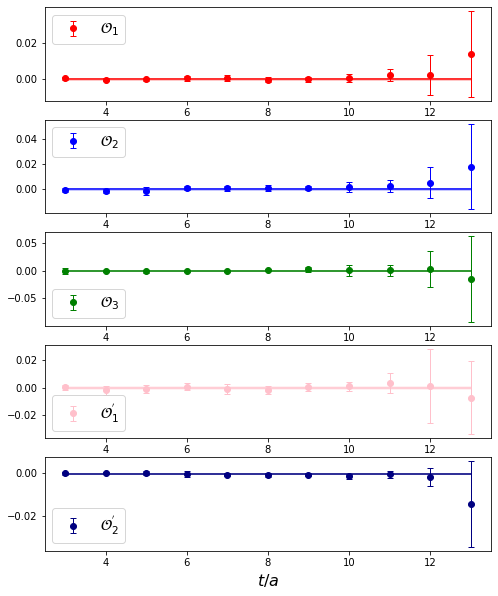

In [70]:
f, axs = plt.subplots(5,1,figsize=(8,10))
operators = [O1, O2, O3, O1p, O2p]
colors = ['red', 'blue', 'green', 'pink', 'navy']
labels = ["$\\mathcal{O}_{1}$", "$\\mathcal{O}_{2}$", "$\\mathcal{O}_{3}$", 
             "$\\mathcal{O}^{'}_{1}$", "$\\mathcal{O}^{'}_{2}$"] 

for i in range(5):
    O = operators[i]
    c = colors[i]
    
    x_all, y_all = make_data(C=O, T=16, tm=0)
    time = x_all
    mean = gv.mean(y_all)
    errs = gv.sdev(y_all)
    
    label = labels[i]
    axs[i].errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)
    
    x, y = make_data(C=O, T=16, tm=0)
    p0 = None              
    prior = make_prior()
    fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)

    x_ = np.linspace(min(x), max(x), 500)
    y_ = fcn(x_, fit.p)
    y_mean, y_upper, y_lower = plot_fit(x_, y_)
    axs[i].plot(x_, y_mean, color=c)
    axs[i].fill_between(x_, y_lower, y_upper, color=c, alpha = 0.15)
    
    fit, z = lsqfit.empbayes_fit([1.0e-6], fitargs)
    print(fit)
    
    axs[i].legend(loc='best', prop={"size":15})
# plt.ylabel("$\\mathcal{R}_{i}(t)$", fontsize=16)
plt.xlabel("$t/a$", fontsize=16)

In [63]:
x

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [67]:
y

array([4(636)e-06, 0.0003(11), 0.00016(65), -0.00042(56), -0.00067(93),
       -0.0007(10), -0.00065(88), -0.0011(22), -0.0003(15), -0.0016(39),
       -0.014(35)], dtype=object)

In [69]:
fcn(2, prior)

0.0(1.0)

Least Square Fit:
  chi2/dof [dof] = 24 [5]    Q = 1e-23    logGBF = -26.526

Parameters:
              a   0.0011382462370 (15)          [ 0.0011382462370 (15) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 3.1 [5]    Q = 0.0091    logGBF = 24.492

Parameters:
              a   -0.00161593124091646 (89)            [ -0.00161593124091646 (89) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 23 [5]    Q = 6.7e-23    logGBF = -29.167

Parameters:
              a   -0.00550925533206 (36)           [ -0.00550925533206 (36) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 1 [5]    Q = 0.41    logGBF = 27.627

Parameters:

Text(0.5, 0, '$t/a$')

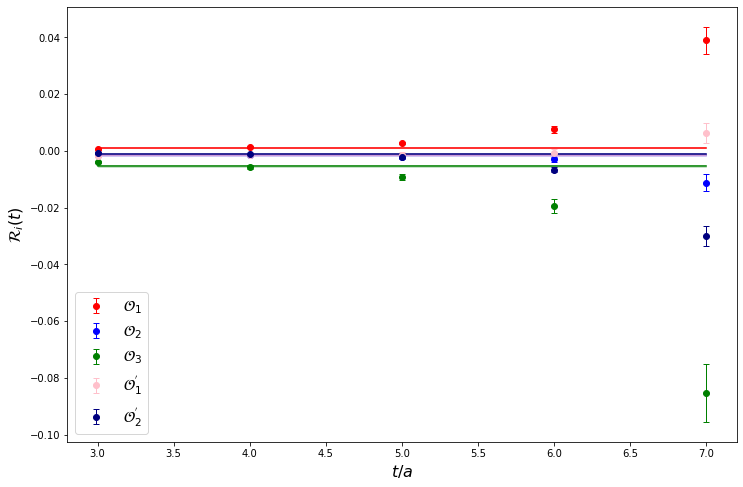

In [23]:
plt.figure(figsize=(12,8))
operators = [O1, O2, O3, O1p, O2p]
colors = ['red', 'blue', 'green', 'pink', 'navy']
labels = ["$\\mathcal{O}_{1}$", "$\\mathcal{O}_{2}$", "$\\mathcal{O}_{3}$", 
             "$\\mathcal{O}^{'}_{1}$", "$\\mathcal{O}^{'}_{2}$"] 

for i in range(5):
    O = operators[i]
    c = colors[i]
    
    x_all, y_all = make_data(C=O, T=10, tm=6)
    time = x_all
    mean = gv.mean(y_all)
    errs = gv.sdev(y_all)
    
    label = labels[i]
    plt.errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)
    
    x, y = make_data(C=O, T=10, tm=6)
    p0 = None              
    prior = make_prior()
    fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)

    x_ = np.linspace(min(x), max(x), 500)
    y_ = fcn(x_, fit.p)
    y_mean, y_upper, y_lower = plot_fit(x_, y_)
    plt.plot(x_, y_mean, color=c)
    plt.fill_between(x_, y_lower, y_upper, color=c, alpha = 0.15)
    
    fit, z = lsqfit.empbayes_fit([1.0, 1.0], fitargs)
    print(fit)
    
    plt.legend(loc='best', prop={"size":15})
plt.ylabel("$\\mathcal{R}_{i}(t)$", fontsize=16)
plt.xlabel("$t/a$", fontsize=16)

# Excited States Fit

In [24]:
def make_data(C, T=16, tm=0):
    ts = range(Gap, T+1-Gap)
    vals = []
    for t in ts:
        num = C[(C['Sep']==T) & (C['tm']==tm) & (C['t']==t)]['Complex']
        num = bootstrap_resample(num, len(num))
        num = np.array(num)

        de = C2[(C2['Src']==0) & (C2['Sep']==T)]['Complex']
        de = bootstrap_resample(de, len(de))
        de = np.array(de)
        
        val = (num/de*(4**3)).real
        # val = abs(num/de)
        vals.append(val)
        
    d = {}
    for i in range(len(ts)):
        d[ts[i]] = vals[i]

    df = pd.DataFrame(d)
    mean = np.array(df.mean())
    cov = np.array(df.cov())
    
    return np.array(ts), gv.gvar(mean, cov) 

def make_prior(): # make priors for fit parameters
    prior = gv.BufferDict()        
    prior['a'] = gv.gvar(0.0, 1.0e-1)
    prior['b'] = gv.gvar(0.0, 1.0e-1)
    prior['c'] = gv.gvar(-1.0, 1.0)
    # prior['d'] = gv.gvar(0.0, 1.0)
    return prior

def fcn(x, p):                      
    a = p['a']  
    b = p['b']  
    c = p['c']
    # d = p['d']
    return a + b*np.exp(-c*x)

def fitargs(z):
    prior = gv.BufferDict() 
    prior['a'] = gv.gvar(gv.gvar(fit.p['a'].mean, z[0]))
    prior['b'] = gv.gvar(gv.gvar(fit.p['b'].mean, z[1]))
    prior['c'] = gv.gvar(gv.gvar(fit.p['c'].mean, z[2]))
    # prior['d'] = gv.gvar(gv.gvar(fit.p['d'].mean, z[3]))
    return dict(prior=prior, fcn=fcn, data=(x,y))

Least Square Fit:
  chi2/dof [dof] = 0.0037 [11]    Q = 1    logGBF = 47.633

Parameters:
              a   0.00009858 (20)       [ 0.00009858 (20) ]  
              b    8.6461(44)e-09       [  8.6461(44)e-09 ]  
              c    -1.001982 (14)       [  -1.001982 (14) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.01 [11]    Q = 1    logGBF = 46.185

Parameters:
              a   -0.00005393 (11)        [ -0.00005393 (11) ]  
              b     1.9613(11)e-08        [   1.9613(11)e-08 ]  
              c     -0.972030 (10)        [   -0.972030 (10) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.0087 [11]    Q = 1    logGBF = 44.194

Parameters:
              a   -0.00026997 (29)        [ -0.00026997 (29) ]  
              b    1

Text(0.5, 0, '$t/a$')

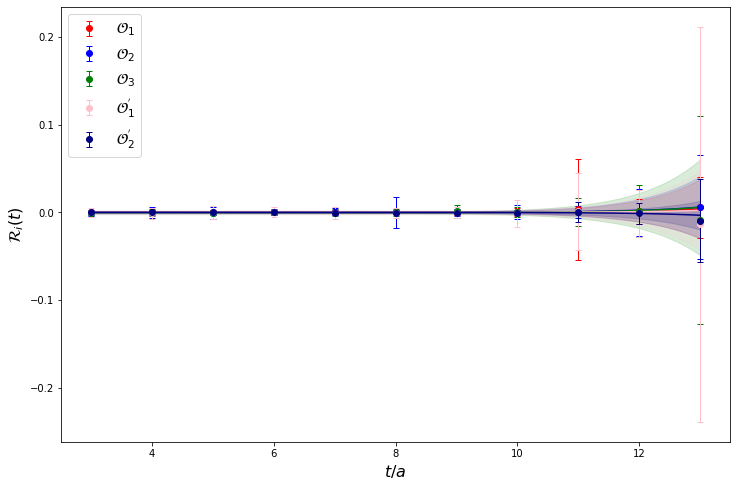

In [25]:
plt.figure(figsize=(12,8))
operators = [O1, O2, O3, O1p, O2p]
colors = ['red', 'blue', 'green', 'pink', 'navy']
labels = ["$\\mathcal{O}_{1}$", "$\\mathcal{O}_{2}$", "$\\mathcal{O}_{3}$", 
             "$\\mathcal{O}^{'}_{1}$", "$\\mathcal{O}^{'}_{2}$"] 

for i in range(5):
    O = operators[i]
    c = colors[i]
    
    x_all, y_all = make_data(C=O, T=16, tm=0)
    time = x_all
    mean = gv.mean(y_all)
    errs = gv.sdev(y_all)
    
    label = labels[i]
    plt.errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)
    
    x, y = make_data(C=O, T=16, tm=0)
    p0 = None              
    prior = make_prior()
    fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)

    x_ = np.linspace(min(x), max(x), 500)
    y_ = fcn(x_, fit.p)
    y_mean, y_upper, y_lower = plot_fit(x_, y_)
    plt.plot(x_, y_mean, color=c)
    plt.fill_between(x_, y_lower, y_upper, color=c, alpha = 0.15)
    
    fit, z = lsqfit.empbayes_fit([1.0e-7, 1.0e-7, 1.0], fitargs)
    print(fit)
    
    plt.legend(loc='best', prop={"size":15})
plt.ylabel("$\\mathcal{R}_{i}(t)$", fontsize=16)
plt.xlabel("$t/a$", fontsize=16)

# Ri(T) (sum over t)

In [26]:
def make_data(C): 
    seps = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
    vals = []
    for s in seps:
        tm = min(sep_tm[s])
        l = []
        for t in range(Gap, s+1-Gap):
            num_t = C[(C['Sep']==s) & (C['tm']==tm) & (C['t']==t)]['Complex']
            num_t = bootstrap_resample(num_t, len(num_t), len(num_t))
            num_t = np.array(num_t)
            l.append(num_t)  

        num = l[0]
        for i in range(1,len(l)):
            num += l[i]

        de = C2[(C2['Src']==0) & (C2['Sep']==s)]['Complex']
        de = bootstrap_resample(de, len(num), len(de))
        de = np.array(de)

        val = (num/de*(4**3)).real
        vals.append(val)
        
    d = {}
    for i in range(len(seps)):
        d[seps[i]] = vals[i]

    df = pd.DataFrame(d)
    mean = np.array(df.mean())
    cov = np.array(df.cov())
    
    return np.array(seps), gv.gvar(mean, cov) 

def make_prior(): # make priors for fit parameters
    prior = gv.BufferDict()        
    prior['a'] = gv.gvar(1.0, 1.0)
    return prior

def fcn(x, p):                      
    a = p['a']                    
    return a + 0*x

def fitargs(z):
    prior = gv.BufferDict() 
    prior['a'] = gv.gvar(gv.gvar(fit.p['a'].mean, z[0]))
    return dict(prior=prior, fcn=fcn, data=(x,y))

Least Square Fit:
  chi2/dof [dof] = 5.2 [11]    Q = 2.5e-08    logGBF = 9.3689

Parameters:
              a   0.03955790038665 (73)          [ 0.03955790038665 (73) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 6.9 [11]    Q = 8.1e-12    logGBF = 4.2591

Parameters:
              a   -0.00947691409372 (73)           [ -0.00947691409372 (73) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 8.9 [11]    Q = 4.5e-16    logGBF = -21.319

Parameters:
              a   -0.087037859883 (93)          [ -0.087037859883 (93) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 1.2 [11]    Q = 0.29    logGBF = 34.453

Parameters:

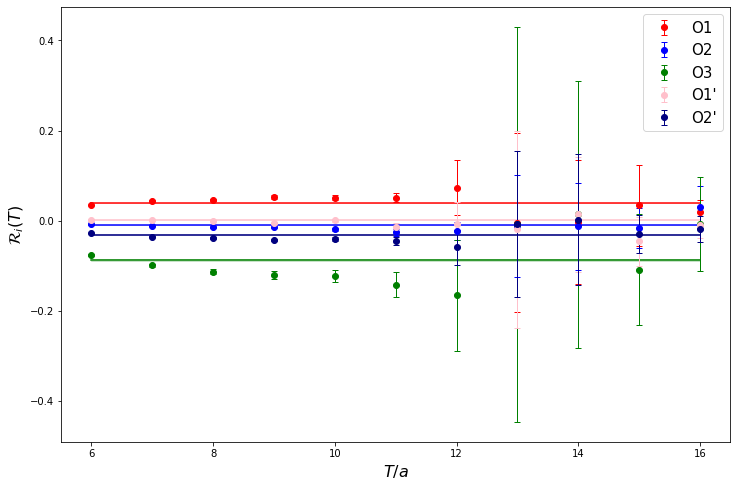

In [27]:
plt.figure(figsize=(12,8))
operators = [O1, O2, O3, O1p, O2p]
colors = ['red', 'blue', 'green', 'pink', 'navy']

for i in range(len(operators)): 
    O = operators[i]
    c = colors[i]
    
    x_all, y_all = make_data(O)
    time = x_all
    mean = gv.mean(y_all)
    errs = gv.sdev(y_all)
    
    label = 'O'+str(i+1)
    if i>=3:
        label = 'O'+str((i+1)%3)+'\''
    plt.errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)

    x, y = make_data(O)
    p0 = None              
    prior = make_prior()
    fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
    # print(fit) 

    x_ = np.linspace(min(x), max(x), 500)
    y_ = fcn(x_, fit.p)
    y_mean, y_upper, y_lower = plot_fit(x_, y_)
    plt.plot(x_, y_mean, color=c)
    plt.fill_between(x_, y_lower, y_upper, color=c, alpha = 0.15)
    
    fit, z = lsqfit.empbayes_fit([1.0, 1.0], fitargs)
    print(fit)
    
plt.ylabel("$\\mathcal{R}_{i}(T)$", fontsize=16)
plt.xlabel("$T/a$", fontsize=16)
plt.legend(loc='best', prop={"size":15})

# Ri(T) (fixed t)

In [28]:
def make_data(C, t=0): 
    seps = [16, 15, 14, 13, 12, 11, 10, 9, 8]
    vals = []
    for s in seps:
        tm = min(sep_tm[s])

        num = C[(C['Sep']==s) & (C['tm']==tm) & (C['t']==t)]['Complex']
        num = bootstrap_resample(num, len(num), len(num))
        num = np.array(num)

        de = C2[(C2['Src']==0) & (C2['Sep']==s)]['Complex']
        de = bootstrap_resample(de, len(num), len(de))
        de = np.array(de)

        val = (num/de*(4**3)).real
        vals.append(val)
        
    d = {}
    for i in range(len(seps)):
        d[seps[i]] = vals[i]

    df = pd.DataFrame(d)
    mean = np.array(df.mean())
    cov = np.array(df.cov())
    
    return np.array(seps), gv.gvar(mean, cov) 

def make_prior(): # make priors for fit parameters
    prior = gv.BufferDict()        
    prior['a'] = gv.gvar(1.0, 1.0)
    return prior

def fcn(x, p):                      
    a = p['a']                    
    return a + 0*x

def fitargs(z):
    prior = gv.BufferDict() 
    prior['a'] = gv.gvar(gv.gvar(fit.p['a'].mean, z[0]))
    return dict(prior=prior, fcn=fcn, data=(x,y))

Least Square Fit:
  chi2/dof [dof] = 11 [9]    Q = 2.3e-17    logGBF = 8.9061

Parameters:
              a   0.00111492196396826 (89)            [ 0.00111492196396826 (89) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.39 [9]    Q = 0.94    logGBF = 50.421

Parameters:
              a   -0.001570561316 (12)          [ -0.001570561316 (12) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 9.2 [9]    Q = 4.5e-14    logGBF = 9.7064

Parameters:
              a   -0.00510355667531540 (89)            [ -0.00510355667531540 (89) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.67 [9]    Q = 0.73    logGBF = 45.836

Par

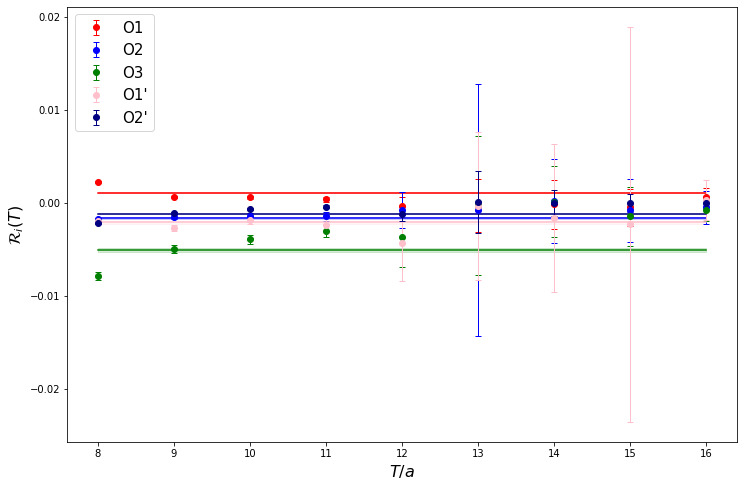

In [29]:
plt.figure(figsize=(12,8))
operators = [O1, O2, O3, O1p, O2p]
colors = ['red', 'blue', 'green', 'pink', 'navy']

for i in range(len(operators)): 
    O = operators[i]
    c = colors[i]
    
    x_all, y_all = make_data(O, t=3)
    time = x_all
    mean = gv.mean(y_all)
    errs = gv.sdev(y_all)
    
    label = 'O'+str(i+1)
    if i>=3:
        label = 'O'+str((i+1)%3)+'\''
    plt.errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)

    x, y = make_data(O, t=3)
    p0 = None              
    prior = make_prior()
    fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
    # print(fit) 

    x_ = np.linspace(min(x), max(x), 500)
    y_ = fcn(x_, fit.p)
    y_mean, y_upper, y_lower = plot_fit(x_, y_)
    plt.plot(x_, y_mean, color=c)
    plt.fill_between(x_, y_lower, y_upper, color=c, alpha = 0.15)
    
    fit, z = lsqfit.empbayes_fit([1.0, 1.0], fitargs)
    print(fit)
    
plt.ylabel("$\\mathcal{R}_{i}(T)$", fontsize=16)
plt.xlabel("$T/a$", fontsize=16)
plt.legend(loc='best', prop={"size":15})

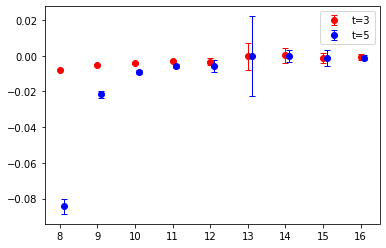

In [30]:
x, y = make_data(O3,t=3)
mean = gv.mean(y)
errs = gv.sdev(y)
plt.errorbar(x, mean, yerr=errs, fmt='o', color='red', elinewidth=1, capsize=3, capthick=1, label='t=3')

x, y = make_data(O3,t=5)
mean = gv.mean(y)
errs = gv.sdev(y)
plt.errorbar(x+np.array([0.1]*len(x)), mean, yerr=errs, fmt='o', color='blue', elinewidth=1, capsize=3, capthick=1, label='t=5')
plt.legend(loc='best')

# Ri(t) fixed Oi and sep

In [31]:
def make_data(C, s=16, tm=0):
    ts = []
    vals = []
    for t in range(Gap, s+1-Gap):
        num = list(C[(C['Sep']==s) & (C['tm']==tm) & (C['t']==t)]['Complex'])
        num += list(C[(C['Sep']==s) & (C['tm']==(tm+8)%48) & (C['t']==t)]['Complex'])
        num += list(C[(C['Sep']==s) & (C['tm']==(tm+16)%48) & (C['t']==t)]['Complex'])
        num += list(C[(C['Sep']==s) & (C['tm']==(tm+24)%48) & (C['t']==t)]['Complex'])
        num += list(C[(C['Sep']==s) & (C['tm']==(tm+32)%48) & (C['t']==t)]['Complex'])
        num += list(C[(C['Sep']==s) & (C['tm']==(tm+40)%48) & (C['t']==t)]['Complex'])
        num = bootstrap_resample(num, len(num), len(num))
        num = np.array(num)

        de = C2[(C2['Src']==0) & (C2['Sep']==s)]['Complex']
        de = bootstrap_resample(de, len(num), len(de))
        de = np.array(de)
        
        #val = (num/de*(4**3)).real
        val = abs(num/de*(4**3))
        vals.append(val)
        ts.append(t)
        
    d = {}
    for i in range(len(ts)):
        d[ts[i]] = vals[i]

    df = pd.DataFrame(d)
    mean = np.array(df.mean())
    cov = np.array(df.cov())
    
    return np.array(ts), gv.gvar(mean, cov) 

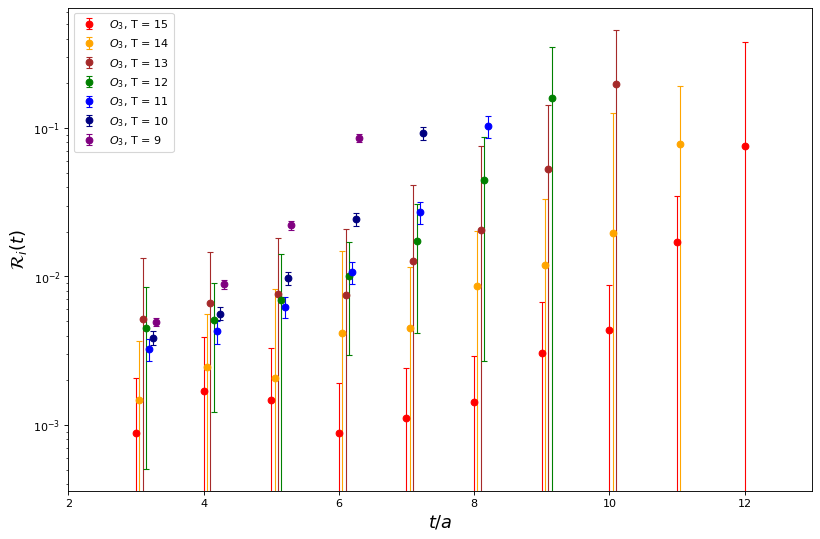

In [33]:
plt.figure(figsize=(12, 8), dpi=80)

operators = [O1, O2, O3, O1p, O2p]
op_name = ['$O_{1}$', '$O_{2}$', '$O_{3}$', '$O_{1}$'+'\'', '$O_{2}$'+'\'']

# seps = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
seps = [15, 14, 13, 12, 11, 10, 9]
# colors = ['red', 'pink', 'orange', 'yellow', 'brown', 'green', 
#           'blue', 'navy', 'cyan', 'purple', 'black', 'grey']
colors = ['red', 'orange', 'brown', 'green', 'blue', 'navy', 'purple', 'black', 'grey']

k = 2
O = operators[k]
O_name = op_name[k]

for i in range(len(seps)):
    s = seps[i]
    c = colors[i]
    
    x, y = make_data(O, s=s, tm=min(sep_tm[s]))
    mean = gv.mean(y)
    errs = gv.sdev(y)
    label = O_name + ", T = " + str(s)
    plt.errorbar(x+[0.05*i]*len(x), mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)

plt.ylabel("$\\mathcal{R}_{i}(t)$", fontsize=16)
plt.xlabel("$t/a$", fontsize=16)
plt.xlim([2, 13])
plt.yscale("log")
plt.legend(loc='best')

In [31]:
# # ground state
# # Excited states
# # seps = [12, 11, 10, 9, 8]
# sep = 12
# def c3_ground(t, M1):
#     out = M1
#     return out

# means = []
# errors = []
# t_op = []
# for t in range(10):
#     t_op.append(t)

#     num_t = C[(C['Sep']==sep) & (C['tm']==0) & (C['t']==t)]['val']
#     num_t = jacknife_resample(num_t)
#     num = np.array(num_t) 
    
#     val = num
#     means.append(np.mean(val))
#     errors.append(np.std(val) * np.sqrt(len(num))) 
    
# plt.errorbar(t_op, means, yerr=errors, fmt='.k', label='Data')

# popt, pcov = curve_fit(c3_ground, t_op, means, maxfev=5000)
# print(popt, pcov)
# x_ = np.linspace(min(t_op)-0.1, max(t_op)+0.1, 500)
# y_ = [c3_ground(x_[i], *popt) for i in range(x_.shape[0])] 
# plt.plot(x_, y_, 'r-', label='fit')

# Excited States Fit

In [34]:
# C3 only 
def make_data(C):
    sep = [6,7,8,9,10,11,12,13,14,15,16]
    sep_op = []
    vals = []
    x1 = []
    x2 = []
    
    for s in sep:
        for t in range(Gap, s+1-Gap):
            tm = min(sep_tm[s])
            num = C[(C['Sep']==s) & (C['tm']==tm) & (C['t']==t)]['Complex']
            num = bootstrap_resample(num, len(num))
            num = np.array(num)
            val = num.real
            
            vals.append(val)
            sep_op.append([s, t])
            x1.append(s)
            x2.append(t)
        
    d = {}
    for i in range(len(sep_op)):
        s = sep_op[i][0]
        t = sep_op[i][1]
        d[str(s)+','+str(t)] = vals[i]
        
    df = pd.DataFrame(d)
    mean = np.array(df.mean())
    cov = np.array(df.cov())
    
    return np.array([x1, x2]), gv.gvar(mean, cov)

def make_prior(n_level): # make priors for fit parameters
    prior = gv.BufferDict()        
    prior['a'] = [gv.gvar(5.0e-1, 100) for i in range(int(n_level**2))]
    prior['E'] = [gv.gvar(0.0, 1) for i in range(n_level)]
    return prior

def fcn(x, p):                      # function used to fit x, y data
    s = x[0]
    t = x[1]
    a = p['a']                      # array of a[i]s
    E = p['E']                      # array of E[i]s
    E = np.exp(E)
    E = np.cumsum(E)
    n_level = len(E)
    
    result = 0.0
    for i in range(n_level):
        for j in range(n_level):
            idx = i * n_level + j
            result += np.exp( -E[i]*s - (E[j]-E[i])*t ) * a[idx] 

    return result

In [35]:
# Set operator 
O = O1

In [36]:
x, y = make_data(C=O)              # collect fit data
p0 = None 

for n_level in range(1, 5):
    print('----- n_level =', n_level, '-----')
    prior = make_prior(n_level)
    fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
    print(fit)                  # print the fit results
    
    a = fit.p['a']
    print(a)
    E = fit.p['E']
    E = np.exp(E)
    E = np.cumsum(E)
    print(E)

----- n_level = 1 -----
Least Square Fit:
  chi2/dof [dof] = 16 [66]    Q = 2.4e-172    logGBF = 1186.2

Parameters:
            a 0      744 (91)     [ 0.5 (100.0) ]  *****
            E 0   1.0221 (57)     [   0.0 (1.0) ]  *

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 49/0.1)
  fitter = scipy_least_squares    method = trf

[744(91)]
[2.779(16)]
----- n_level = 2 -----
Least Square Fit:
  chi2/dof [dof] = 5.4 [66]    Q = 4.8e-41    logGBF = 1509.8

Parameters:
            a 0    -0.98 (36)     [ 0.5 (100.0) ]  
              1    10.0 (7.6)     [ 0.5 (100.0) ]  
              2      910 (86)     [ 0.5 (100.0) ]  *****
              3      59 (100)     [ 0.5 (100.0) ]  
            E 0   0.7850 (75)     [   0.0 (1.0) ]  
              1    0.011 (37)     [   0.0 (1.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 57/0.1)
  fitter = scipy_least_squares    method = trf

[-0.98(36) 10.0(7.6) 910(86) 59(100)]
[2.193(17) 

Least Square Fit:
  chi2/dof [dof] = 5.9 [66]    Q = 7.3e-47    logGBF = 1491.8

Parameters:
            a 0    -1.64 (39)     [ 0.5 (100.0) ]  
              1       21 (55)     [ 0.5 (100.0) ]  
              2       -3 (72)     [ 0.5 (100.0) ]  
              3      241 (81)     [ 0.5 (100.0) ]  **
              4       77 (99)     [ 0.5 (100.0) ]  
              5      24 (100)     [ 0.5 (100.0) ]  
              6      250 (81)     [ 0.5 (100.0) ]  **
              7      28 (100)     [ 0.5 (100.0) ]  
              8      20 (100)     [ 0.5 (100.0) ]  
            E 0   0.7669 (83)     [   0.0 (1.0) ]  
              1   -0.110 (58)     [   0.0 (1.0) ]  
              2    -2.32 (99)     [   0.0 (1.0) ]  **

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10)    (itns/time = 1000*/1.7)
  fitter = scipy_least_squares    method = trf

[-1.64(39) 21(55) -3(72) 241(81) 77(99) 24(100) 250(81) 28(100) 20(100)]
[2.153(18) 3.049(49) 3.146(75)]


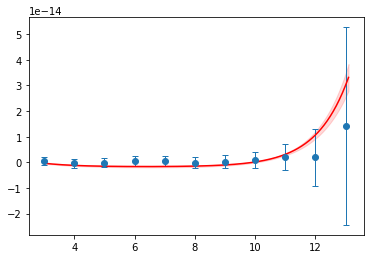

In [37]:
sep = 16
n_level = 3

# get the data
x, y = make_data(O)

# plot the data in 1D
x_marg = []
y_marg = []
for i in range(len(x[0])):
    if x[0][i]==sep:
        x_marg.append(x[1][i])
        y_marg.append(y[i])
mean = gv.mean(np.array(y_marg))
errs = gv.sdev(np.array(y_marg))
plt.errorbar(x_marg, mean, yerr=errs, fmt='o', elinewidth=1, capsize=3, capthick=1, label='Data')

# fit the data
prior = make_prior(n_level)
fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
print(fit)
a = fit.p['a']
print(a)
E = fit.p['E']
E = np.exp(E)
E = np.cumsum(E)
print(E)

# plot fit
x_ = np.linspace(min(x_marg), max(x_marg)+0.1, 500)
y_ = fcn(np.array([[sep]*len(x_), x_]), fit.p)
y_mean, y_upper, y_lower = plot_fit(x_, y_)
plt.plot(x_, y_mean, color='red')
plt.fill_between(x_, y_lower, y_upper, color='red', alpha = 0.15)

Least Square Fit:
  chi2/dof [dof] = 5.6 [66]    Q = 2e-43    logGBF = 1521.2

Parameters:
            a 0       -1.64 (10)       [     -1.64 (23) ]  
              1       21.21 (99)       [     21.2 (1.0) ]  
              2       -2.8 (1.9)       [     -2.8 (2.1) ]  
              3      242.3 (2.6)       [    241.1 (2.6) ]  
              4       76.6 (1.9)       [     76.5 (1.9) ]  
              5       24.0 (1.3)       [     24.0 (1.3) ]  
              6      249.66 (57)       [    249.61 (57) ]  
              7       27.7 (2.0)       [     27.7 (2.0) ]  
              8       20.12 (72)       [     20.11 (72) ]  
            E 0    0.766911 (16)       [  0.766911 (16) ]  
              1   -0.110359 (74)       [ -0.110360 (74) ]  
              2      -2.325 (15)       [    -2.324 (15) ]  

Fit:
      key             y[key]          f(p)[key]
-----------------------------------------------
        0     0.0001582 (67)    0.00007218 (49)  *****
        1       3.39(23)e-06    

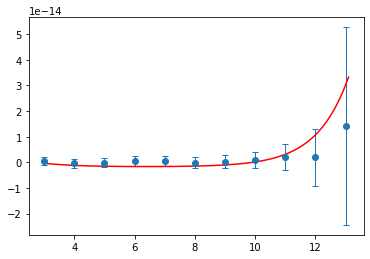

In [38]:
# Bayesian Search
def fitargs(z):
    z1 = z[:n_level**2]
    z2 = z[n_level**2:]
    prior = gv.BufferDict() 
    prior['a'] = [gv.gvar(fit.p['a'][i].mean, z1[i]) for i in range(n_level**2)]
    prior['E'] = [gv.gvar(fit.p['E'][i].mean, z2[i]) for i in range(n_level)]
    return dict(prior=prior, fcn=fcn, data=(x,y))

z1 = [1.0]*(n_level**2)
z2 = [10.0]*n_level
z = z1 + z2
fit, z = lsqfit.empbayes_fit(z, fitargs)
print(fit.format(True))
a = fit.p['a']
print(a)
E = fit.p['E']
E = np.exp(E)
E = np.cumsum(E)
print(E)

plt.errorbar(x_marg, mean, yerr=errs, fmt='o', elinewidth=1, capsize=3, capthick=1, label='Data')
x_ = np.linspace(min(x_marg), max(x_marg)+0.1, 500)
y_ = fcn(np.array([[sep]*len(x_), x_]), fit.p)
y_mean, y_upper, y_lower = plot_fit(x_, y_)
plt.plot(x_, y_mean, color='red')

In [39]:
# C3/C2
def make_data(C, sep_max, sep_min):
    sep = range(sep_min, sep_max+1, 1)#[6,7,8,9,10,11,12,13,14,15,16]
    sep_op = []
    vals = []
    x1 = []
    x2 = []
    
    for s in sep:
        for t in range(Gap, s+1-Gap):
            tm = min(sep_tm[s])
            num = C[(C['Sep']==s) & (C['tm']==tm) & (C['t']==t)]['Complex']
            num = bootstrap_resample(num, len(num), len(num))
            num = np.array(num)
            
            de = C2[(C2['Src']==0) & (C2['Sep']==s)]['Complex']
            de = bootstrap_resample(de, len(num), len(de))
            de = np.array(de)
        
            val = (num/de*(4**3)).real
            vals.append(val)
            sep_op.append([s, t])
            x1.append(s)
            x2.append(t)
        
    d = {}
    for i in range(len(sep_op)):
        s = sep_op[i][0]
        t = sep_op[i][1]
        d[str(s)+','+str(t)] = vals[i]
        
    df = pd.DataFrame(d)
    mean = np.array(df.mean())
    cov = np.array(df.cov())
    
    return np.array([x1, x2]), gv.gvar(mean, cov)

def make_prior(n_level): # make priors for fit parameters
    prior = gv.BufferDict()        
#     prior['a'] = [gv.gvar(5.0e-6, 100) for i in range(2)]
    prior['M'] = [gv.gvar(0.0, 0.1) for i in range(4)]
    prior['E'] = [gv.gvar(0.0, 1) for i in range(2)]
    return prior

def fcn(x, p):                      # function used to fit x, y data
    s = x[0]
    t = x[1]
#     a = p['a'] 
    M = p['M']
    E = p['E'] 
    E = np.exp(E)
    E = np.cumsum(E)
    
    result = M[0]
#     result += M[1] * np.exp(-(E[1]-E[0])*s)
    result += M[1] * np.exp(-(E[1]-E[0])*t)
    result += M[2] * np.exp(-(E[1]-E[0])*(s-t))
    result += M[3] * np.exp(-(E[1]-E[0])*s)
    return result

def fitargs(z):
    prior = gv.BufferDict() 
    prior['M'] = [gv.gvar(fit.p['M'][i].mean, z[i]) for i in range(4)]
    prior['E'] = [gv.gvar(fit.p['E'][i].mean, z[i+4]) for i in range(2)]
    return dict(prior=prior, fcn=fcn, data=(x,y))

Least Square Fit:
  chi2/dof [dof] = 3.8 [66]    Q = 1.8e-23    logGBF = 193.11

Parameters:
            M 0   -0.00009 (17)      [  0.00 (10) ]  
              1    -0.0015 (61)      [  0.00 (10) ]  
              2      1.037 (72)      [  0.00 (10) ]  *****
              3    0.0008 (998)      [  0.00 (10) ]  
            E 0       0.0 (1.0)      [  0.0 (1.0) ]  
              1      0.168 (17)      [  0.0 (1.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 24/0.0)
  fitter = scipy_least_squares    method = trf

M [-0.00009(17) -0.0015(61) 1.037(72) 0.0008(998)]
E [1.0(1.0) 2.2(1.0)]
Least Square Fit:
  chi2/dof [dof] = 0.4 [66]    Q = 1    logGBF = 313.57

Parameters:
            M 0    0.000444 (80)       [  -0.00009 (55) ]  
              1   -0.001508 (47)       [ -0.001508 (47) ]  
              2        3.13 (33)       [      1.0 (1.7) ]  *
              3       -0.10 (78)       [  0.0008 (7834) ]  
            E 0        0.0 (5.9)       [   

Text(0.5, 0, '$t/a$')

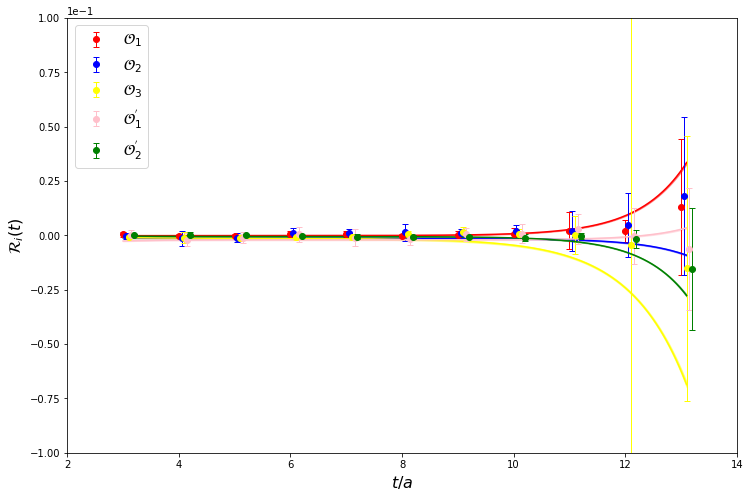

In [40]:
plt.figure(figsize=(12,8))
operators = [O1, O2, O3, O1p, O2p]
colors = ['red', 'blue', 'yellow', 'pink', 'green']
labels = ["$\\mathcal{O}_{1}$", "$\\mathcal{O}_{2}$", "$\\mathcal{O}_{3}$", 
             "$\\mathcal{O}^{'}_{1}$", "$\\mathcal{O}^{'}_{2}$"] 
n_level = 2 
sep = 16

for i in range(5):
    O = operators[i]
    c = colors[i]
    label = labels[i]

    x, y = make_data(O, Sep_Max, Sep_Min)
    # plot the data in 1D
    x_marg = []
    y_marg = []
    for j in range(len(x[0])):
        if x[0][j]==sep:
            x_marg.append(x[1][j])
            y_marg.append(y[j])
    time = np.array(x_marg)+[0.05*i]*len(x_marg)
    mean = gv.mean(np.array(y_marg))
    errs = gv.sdev(np.array(y_marg))
    plt.errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)
    
    p0 = None
    prior = make_prior(n_level)
    fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
    print(fit)
    M = fit.p['M']
    print('M', M)
    E = fit.p['E']
    E = np.exp(E)
    E = np.cumsum(E)
    print('E', E)

    x_ = np.linspace(min(x_marg), max(x_marg)+0.1, 500)
    y_ = fcn(np.array([[sep]*len(x_), x_]), fit.p)
    y_mean, y_upper, y_lower = plot_fit(x_, y_)
    plt.plot(x_, y_mean, color=c)
    plt.fill_between(x_, y_lower, y_upper, color=c, alpha = 0.4)
    
    fit, z = lsqfit.empbayes_fit([1.0]*6, fitargs)
    print(fit)
plt.ticklabel_format(style = 'sci', axis='y', scilimits=(0,0))
plt.xlim([2, 14])
plt.ylim([-0.1, 0.1])
plt.legend(loc='upper left', prop={"size":15})
plt.ylabel("$\\mathcal{R}_{i}(t)$", fontsize=16)
plt.xlabel("$t/a$", fontsize=16)

In [31]:
# plt.figure(figsize=(12,8))
# operators = [O1, O2, O3, O1p, O2p]
# colors = ['red', 'blue', 'yellow', 'pink', 'green']
# labels = ["$\\mathcal{O}_{1}$", "$\\mathcal{O}_{2}$", "$\\mathcal{O}_{3}$", 
#              "$\\mathcal{O}^{'}_{1}$", "$\\mathcal{O}^{'}_{2}$"] 
# n_level = 3
# sep = 16

# for i in range(5):
#     O = operators[i]
#     c = colors[i]
#     label = labels[i]

#     x, y = make_data(O, Sep_Max, Sep_Min)
#     # plot the data in 1D
#     x_marg = []
#     y_marg = []
#     for j in range(len(x[0])):
#         if x[0][j]==sep:
#             x_marg.append(x[1][j])
#             y_marg.append(y[j])
#     time = np.array(x_marg)+[0.05*i]*len(x_marg)
#     mean = gv.mean(np.array(y_marg))
#     errs = gv.sdev(np.array(y_marg))
#     plt.errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)
    
#     p0 = None
#     prior = make_prior(n_level)
#     fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
#     print(fit)
#     M = fit.p['M']
#     print('M', M)
#     E = fit.p['E']
#     E = np.exp(E)
#     E = np.cumsum(E)
#     print('E', E)

#     x_ = np.linspace(min(x_marg), max(x_marg)+0.1, 500)
#     y_ = fcn(np.array([[sep]*len(x_), x_]), fit.p)
#     y_mean, y_upper, y_lower = plot_fit(x_, y_)
#     plt.plot(x_, y_mean, color=c)
#     plt.fill_between(x_, y_lower, y_upper, color=c, alpha = 0.4)
    
# #     fit, z = lsqfit.empbayes_fit([1.0]*6, fitargs)
# #     print(fit)
# plt.ticklabel_format(style = 'sci', axis='y', scilimits=(0,0))
# plt.xlim([2, 14])
# plt.ylim([-0.1, 0.1])
# plt.legend(loc='upper left', prop={"size":15})
# plt.ylabel("$\\mathcal{R}_{i}(t)$", fontsize=16)
# plt.xlabel("$t/a$", fontsize=16)

In [41]:
# C3/C2
def make_data(C, sep_max, sep_min):
    sep = range(sep_min, sep_max+1, 1)#[6,7,8,9,10,11,12,13,14,15,16]
    sep_op = []
    vals = []
    x1 = []
    x2 = []
    
    for s in sep:
        for t in range(Gap+2, s+1-(Gap+2)):
            tm = min(sep_tm[s])
            num = C[(C['Sep']==s) & (C['tm']==tm) & (C['t']==t)]['Complex']
            num = bootstrap_resample(num, len(num), len(num))
            num = np.array(num)
            
            de = C2[(C2['Src']==0) & (C2['Sep']==s)]['Complex']
            de = bootstrap_resample(de, len(num), len(de))
            de = np.array(de)
        
            val = (num/de*(4**3)).real
            vals.append(val)
            sep_op.append([s, t])
            x1.append(s)
            x2.append(t)
        
    d = {}
    for i in range(len(sep_op)):
        s = sep_op[i][0]
        t = sep_op[i][1]
        d[str(s)+','+str(t)] = vals[i]
        
    df = pd.DataFrame(d)
    mean = np.array(df.mean())
    cov = np.array(df.cov())
    
    return np.array([x1, x2]), gv.gvar(mean, cov)

def make_prior(n_level): # make priors for fit parameters
    prior = gv.BufferDict()        
#     prior['a'] = [gv.gvar(5.0e-6, 100) for i in range(2)]
    prior['M'] = [gv.gvar(0.0, 0.1) for i in range(4)]
    prior['E'] = [gv.gvar(0.0, 1) for i in range(2)]
    return prior

def fcn(x, p):                      # function used to fit x, y data
    s = x[0]
    t = x[1]
#     a = p['a'] 
    M = p['M']
    E = p['E'] 
    E = np.exp(E)
    E = np.cumsum(E)
    
    result = M[0]
#     result += M[1] * np.exp(-(E[1]-E[0])*s)
    result += M[1] * np.exp(-(E[1]-E[0])*t)
    result += M[2] * np.exp(-(E[1]-E[0])*(s-t))
    result += M[3] * np.exp(-(E[1]-E[0])*s)
    return result

def fitargs(z):
    prior = gv.BufferDict() 
    prior['M'] = [gv.gvar(fit.p['M'][i].mean, z[i]) for i in range(4)]
    prior['E'] = [gv.gvar(fit.p['E'][i].mean, z[i+4]) for i in range(2)]
    return dict(prior=prior, fcn=fcn, data=(x,y))

Least Square Fit:
  chi2/dof [dof] = 0.24 [28]    Q = 1    logGBF = 129.04

Parameters:
            M 0   -0.00006 (64)      [  0.00 (10) ]  
              1      0.006 (25)      [  0.00 (10) ]  
              2      0.071 (83)      [  0.00 (10) ]  
              3     0.007 (100)      [  0.00 (10) ]  
            E 0      2e-22 +- 1      [  0.0 (1.0) ]  
              1      -0.35 (36)      [  0.0 (1.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 22/0.0)
  fitter = scipy_least_squares    method = trf

M [-0.00006(64) 0.006(25) 0.071(83) 0.007(100)]
E [1.0(1.0) 1.7(1.0)]
Least Square Fit:
  chi2/dof [dof] = 0.21 [28]    Q = 1    logGBF = 116.59

Parameters:
            M 0   0.0015 (16)     [  0.00 (10) ]  
              1   -0.020 (35)     [  0.00 (10) ]  
              2   -0.031 (49)     [  0.00 (10) ]  
              3    0.002 (99)     [  0.00 (10) ]  
            E 0     0.0 (1.0)     [  0.0 (1.0) ]  
              1    -0.66 (70)     [  0.0 

Text(0.5, 0, '$t/a$')

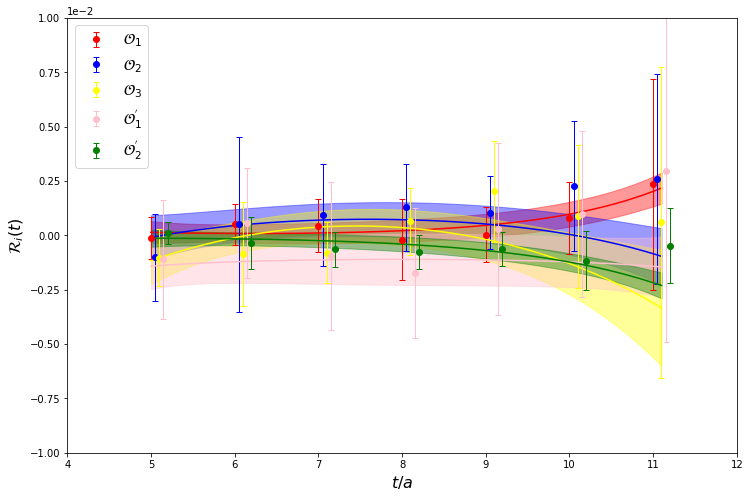

In [42]:
plt.figure(figsize=(12,8))
operators = [O1, O2, O3, O1p, O2p]
colors = ['red', 'blue', 'yellow', 'pink', 'green']
labels = ["$\\mathcal{O}_{1}$", "$\\mathcal{O}_{2}$", "$\\mathcal{O}_{3}$", 
             "$\\mathcal{O}^{'}_{1}$", "$\\mathcal{O}^{'}_{2}$"] 
n_level = 2 
sep = 16
data_x = []
data_y = []
data_e = []
Ms = []

for i in range(5):
    O = operators[i]
    c = colors[i]
    label = labels[i]

    x, y = make_data(O, sep, Sep_Min)
    # plot the data in 1D
    x_marg = []
    y_marg = []
    for j in range(len(x[0])):
        if x[0][j]==sep:
            x_marg.append(x[1][j])
            y_marg.append(y[j])
    time = np.array(x_marg)+[0.05*i]*len(x_marg)
    mean = gv.mean(np.array(y_marg))
    errs = gv.sdev(np.array(y_marg))
    plt.errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)
    data_x.append(time)
    data_y.append(mean)
    data_e.append(errs)
    
    p0 = None
    prior = make_prior(n_level)
    fit = lsqfit.nonlinear_fit(data=(x, y), fcn=fcn, prior=prior, p0=p0)
    print(fit)
    M = fit.p['M']
    Ms.append(M[0])
    print('M', M)
    E = fit.p['E']
    E = np.exp(E)
    E = np.cumsum(E)
    print('E', E)

    x_ = np.linspace(min(x_marg), max(x_marg)+0.1, 500)
    y_ = fcn(np.array([[sep]*len(x_), x_]), fit.p)
    y_mean, y_upper, y_lower = plot_fit(x_, y_)
    plt.plot(x_, y_mean, color=c)
    plt.fill_between(x_, y_lower, y_upper, color=c, alpha = 0.4)
    
#     fit, z = lsqfit.empbayes_fit([1.0]*6, fitargs)
#     print(fit)
plt.ticklabel_format(style = 'sci', axis='y', scilimits=(0,0))
plt.xlim([4, 12])
plt.ylim([-0.01, 0.01])
plt.legend(loc='upper left', prop={"size":15})
plt.ylabel("$\\mathcal{R}_{i}(t)$", fontsize=16)
plt.xlabel("$t/a$", fontsize=16)

Text(0.5, 0, '$t/a$')

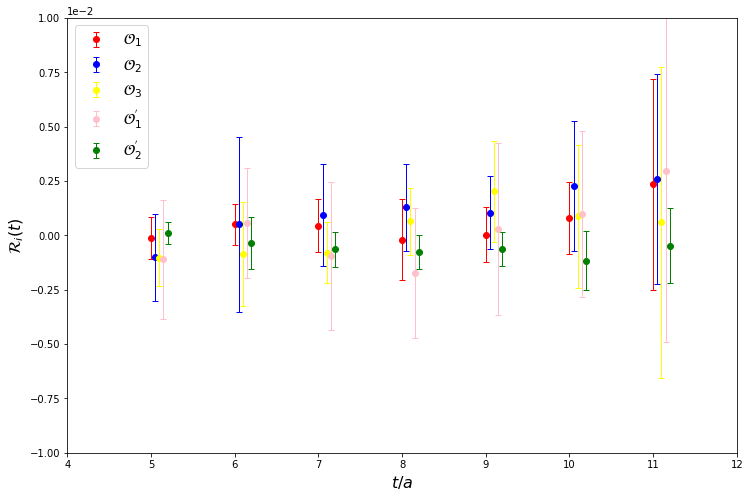

In [43]:
plt.figure(figsize=(12,8))
operators = [O1, O2, O3, O1p, O2p]
colors = ['red', 'blue', 'yellow', 'pink', 'green']
labels = ["$\\mathcal{O}_{1}$", "$\\mathcal{O}_{2}$", "$\\mathcal{O}_{3}$", 
             "$\\mathcal{O}^{'}_{1}$", "$\\mathcal{O}^{'}_{2}$"] 
n_level = 2 
sep = 14

for i in range(5):
    O = operators[i]
    c = colors[i]
    label = labels[i]

    time = data_x[i]
    mean = data_y[i]
    errs = data_e[i]
    plt.errorbar(time, mean, yerr=errs, fmt='o', color=c, elinewidth=1, capsize=3, capthick=1, label=label)

plt.ticklabel_format(style = 'sci', axis='y', scilimits=(0,0))
# plt.xlim([3, 13])
# plt.ylim([-0.03, 0.03])
plt.xlim([4, 12])
plt.ylim([-0.01, 0.01])
plt.legend(loc='upper left', prop={"size":15})
plt.ylabel("$\\mathcal{R}_{i}(t)$", fontsize=16)
plt.xlabel("$t/a$", fontsize=16)

In [44]:
[Ms[i]*2*gv.gvar(2.356, 0.027) for i in range(len(Ms))]

[-0.0003(30), 0.0072(77), 0.025(18), -0.0048(65), -0.00002(252)]